In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
#simple perov , #virtual compostion creation

#expand the library

In [18]:
# =============================================================================
# PEROVSKITE DISCOVERY: EXPANDED LIBRARY (INTEGER FORMAT ONLY)
# Author: DHARSHANKUMAAR
# Date: 2025-10-16 14:16:53 UTC
# Version: 5.1 (Fixed - Integer stoichiometry only)
# =============================================================================

import random
import numpy as np

RANDOM_SEED = 42
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

print("="*80)
print("PEROVSKITE DISCOVERY: EXPANDED LIBRARY (INTEGER FORMAT)")
print("="*80)
print(f"🔒 Random Seed: {RANDOM_SEED}")
print(f"🆕 NEW: Integer stoichiometry only (matches training)")
print("="*80)

# =============================================================================
# IMPORT LIBRARIES
# =============================================================================
import pandas as pd
import joblib
from deap import base, creator, tools, algorithms
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

print("\n✓ Libraries imported")

# =============================================================================
# INSTALL CBFV
# =============================================================================
import subprocess
subprocess.check_call(['pip', 'install', 'CBFV', '--quiet'])

from CBFV import composition

print("✓ CBFV installed")

# =============================================================================
# LOAD TRAINING DATA
# =============================================================================

print("\n" + "="*80)
print("LOADING TRAINING DATA")
print("="*80)

odf = pd.read_csv("/kaggle/input/magpie-perov/CBFV_magpie_extracted_features.csv")

training_comps_set = set(odf['composition'].tolist())
all_feature_cols = [c for c in odf.columns 
                   if c not in ['composition', 'formation_energy (eV/atom)', 'band_gap (eV)']]

X_fe_train = odf[all_feature_cols].values
X_bg_train = odf[all_feature_cols].values
actual_train_comps = list(odf['composition'].values)

print(f"✓ Training: {len(odf)} compositions")
print(f"✓ Features: {len(all_feature_cols)}")
print(f"✓ Format: Integer stoichiometry only (e.g., 'Ac1 Al1 O3')")

# =============================================================================
# GENERATE EXPANDED VIRTUAL LIBRARY (INTEGER ONLY)
# =============================================================================

print("\n" + "="*80)
print("GENERATING EXPANDED VIRTUAL LIBRARY (INTEGER FORMAT)")
print("="*80)

# MASSIVELY EXPANDED element library
A_SITE_ELEMENTS = [
    # Alkaline earth (3)
    'Ca', 'Sr', 'Ba',
    # Full Lanthanide series (17)
    'La', 'Ce', 'Pr', 'Nd', 'Pm', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu',
    # Rare earth-like (2)
    'Y', 'Sc',
    # Alkali (3)
    'K', 'Rb', 'Cs',
    # Post-transition (3)
    'Pb', 'Bi', 'Tl',
    # Others
    'Mg', 'Cd', 'Hg', 'Sn', 'In'
]

B_SITE_ELEMENTS = [
    # Early transition metals (9)
    'Ti', 'Zr', 'Hf', 'V', 'Nb', 'Ta', 'Cr', 'Mo', 'W',
    # Mid transition metals (9)
    'Mn', 'Tc', 'Re', 'Fe', 'Ru', 'Os', 'Co', 'Rh', 'Ir',
    # Late transition metals (9)
    'Ni', 'Pd', 'Pt', 'Cu', 'Ag', 'Au', 'Zn', 'Cd', 'Hg',
    # Main group (12)
    'Al', 'Ga', 'In', 'Tl', 'Si', 'Ge', 'Sn', 'Pb', 'Sc', 'Y', 'Bi', 'Sb'
]

print(f"📝 Element library:")
print(f"   A-site: {len(A_SITE_ELEMENTS)} elements")
print(f"   B-site: {len(B_SITE_ELEMENTS)} elements")
print(f"   Theoretical maximum: {len(A_SITE_ELEMENTS) * len(B_SITE_ELEMENTS)} = {len(A_SITE_ELEMENTS) * len(B_SITE_ELEMENTS)} compositions")

# Generate ALL simple ABO3 combinations
print(f"\n📝 Generating simple ABO3 combinations...")

virtual_compositions = []

for A in A_SITE_ELEMENTS:
    for B in B_SITE_ELEMENTS:
        comp = f"{A}1 {B}1 O3"
        
        # Only add if NOT in training data
        if comp not in training_comps_set:
            virtual_compositions.append(comp)

print(f"\n✓ Generated compositions:")
print(f"   - Total possible: {len(A_SITE_ELEMENTS) * len(B_SITE_ELEMENTS)}")
print(f"   - Already in training: {len(A_SITE_ELEMENTS) * len(B_SITE_ELEMENTS) - len(virtual_compositions)}")
print(f"   - NEW virtual: {len(virtual_compositions)}")

if len(virtual_compositions) > 0:
    print(f"\n  Examples (first 20):")
    for i, comp in enumerate(virtual_compositions[:20], 1):
        print(f"    {i:2d}. {comp}")

print(f"\n✓ Final virtual library: {len(virtual_compositions)} compositions")
print(f"✓ ALL in integer format (matches training) ✅")

# =============================================================================
# EXTRACT CBFV FEATURES
# =============================================================================

print("\n" + "="*80)
print("EXTRACTING CBFV FEATURES")
print("="*80)

if len(virtual_compositions) > 0:
    df_virtual = pd.DataFrame({
        'formula': virtual_compositions,
        'target': [0.0] * len(virtual_compositions)
    })
    
    print(f"✓ Prepared: {len(df_virtual)} compositions")
    print(f"\n🔬 Extracting CBFV features...")
    
    X_virtual, y_virtual, formulae_virtual, skipped = composition.generate_features(
        df_virtual,
        elem_prop='magpie',
        drop_duplicates=False,
        extend_features=True,
        sum_feat=True
    )
    
    print(f"\n✓ Extraction complete!")
    print(f"  - Valid: {len(formulae_virtual)}")
    print(f"  - Features: {X_virtual.shape[1]}")
    print(f"  - Skipped: {len(skipped)}")
    
    # Align
    if X_virtual.shape[1] == len(all_feature_cols):
        X_virtual_aligned = X_virtual
        print(f"  ✅ Perfect alignment!")
    elif X_virtual.shape[1] < len(all_feature_cols):
        X_virtual_aligned = np.zeros((len(formulae_virtual), len(all_feature_cols)))
        X_virtual_aligned[:, :X_virtual.shape[1]] = X_virtual
        print(f"  ⚠️  Padded: {X_virtual.shape[1]} → {len(all_feature_cols)}")
    else:
        X_virtual_aligned = X_virtual[:, :len(all_feature_cols)]
        print(f"  ⚠️  Truncated: {X_virtual.shape[1]} → {len(all_feature_cols)}")
    
    formulae_virtual_list = (
        formulae_virtual.tolist() if hasattr(formulae_virtual, 'tolist')
        else list(formulae_virtual)
    )
else:
    X_virtual_aligned = np.empty((0, len(all_feature_cols)))
    formulae_virtual_list = []

# =============================================================================
# LOAD MODELS
# =============================================================================

print("\n" + "="*80)
print("LOADING MODELS")
print("="*80)

model_fe = joblib.load('/kaggle/input/fe-checks-new/best_model_CatBoost (1).pkl')
scaler_X_fe = joblib.load('/kaggle/input/fe-checks-new/scaler_X_fe.pkl')
scaler_y_fe = joblib.load('/kaggle/input/fe-checks-new/scaler_y_fe.pkl')
features_fe = joblib.load('/kaggle/input/fe-checks-new/selected_features_fe.pkl')

clf_metal = joblib.load('/kaggle/input/bg-new/classifier_metal_nonmetal.pkl')
reg_bg = joblib.load('/kaggle/input/bg-new/regressor_bandgap_nonmetal.pkl')
scaler_X_bg = joblib.load('/kaggle/input/bg-new/scaler_X_bg_reg.pkl')
scaler_y_bg = joblib.load('/kaggle/input/bg-new/scaler_y_bg_reg.pkl')
features_clf = joblib.load('/kaggle/input/bg-new/features_classifier.pkl')
features_reg = joblib.load('/kaggle/input/bg-new/features_regressor.pkl')

print("✓ All models loaded")

# =============================================================================
# COMBINE DATA
# =============================================================================

print("\n" + "="*80)
print("COMBINING DATA")
print("="*80)

all_features_fe = np.vstack([X_fe_train, X_virtual_aligned])
all_features_bg = np.vstack([X_bg_train, X_virtual_aligned])

n_training = len(X_fe_train)
n_virtual = len(X_virtual_aligned)
n_total = len(all_features_fe)

source_labels = ['Training'] * n_training + ['Virtual'] * n_virtual
actual_compositions = actual_train_comps + formulae_virtual_list

print(f"✓ Combined:")
print(f"  - Training: {n_training}")
print(f"  - Virtual: {n_virtual}")
print(f"  - Total: {n_total}")

# =============================================================================
# PREDICTION FUNCTION
# =============================================================================

def predict_properties(features_fe_all, features_bg_all):
    if features_fe_all.ndim == 1:
        features_fe_all = features_fe_all.reshape(1, -1)
    if features_bg_all.ndim == 1:
        features_bg_all = features_bg_all.reshape(1, -1)
    
    df_fe_temp = pd.DataFrame(features_fe_all, columns=all_feature_cols)
    X_fe_selected = df_fe_temp[features_fe].values
    X_fe_scaled = scaler_X_fe.transform(X_fe_selected)
    fe_scaled_pred = model_fe.predict(X_fe_scaled)
    fe_pred = scaler_y_fe.inverse_transform(fe_scaled_pred.reshape(-1, 1))[0][0]
    
    df_bg_temp = pd.DataFrame(features_bg_all, columns=all_feature_cols)
    X_clf = df_bg_temp[features_clf].values
    is_metallic = clf_metal.predict(X_clf)[0]
    
    if is_metallic:
        bg_pred = 0.0
    else:
        X_reg = df_bg_temp[features_reg].values
        X_reg_scaled = scaler_X_bg.transform(X_reg)
        bg_scaled_pred = reg_bg.predict(X_reg_scaled)
        bg_pred = scaler_y_bg.inverse_transform(bg_scaled_pred.reshape(-1, 1))[0][0]
        bg_pred = max(0.0, bg_pred)
    
    return fe_pred, bg_pred

# =============================================================================
# NSGA-II OPTIMIZATION
# =============================================================================

print("\n" + "="*80)
print("NSGA-II OPTIMIZATION")
print("="*80)

try:
    del creator.FitnessMulti
    del creator.Individual
except:
    pass

creator.create("FitnessMulti", base.Fitness, weights=(-1.0, -1.0))
creator.create("Individual", list, fitness=creator.FitnessMulti)

toolbox = base.Toolbox()
toolbox.register("attr_idx", random.randint, 0, n_total - 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_idx, n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

def evaluate(individual):
    idx = individual[0]
    feat_fe = all_features_fe[idx]
    feat_bg = all_features_bg[idx]
    
    fe_pred, bg_pred = predict_properties(feat_fe, feat_bg)
    
    obj1 = fe_pred
    obj2 = abs(bg_pred - 1.34)
    
    return obj1, obj2

toolbox.register("evaluate", evaluate)

def mutate_index(individual, indpb):
    if random.random() < indpb:
        individual[0] = random.randint(0, n_total - 1)
    return individual,

def mate_index(ind1, ind2):
    if random.random() < 0.5:
        ind1[0], ind2[0] = ind2[0], ind1[0]
    return ind1, ind2

toolbox.register("mate", mate_index)
toolbox.register("mutate", mutate_index, indpb=0.3)
toolbox.register("select", tools.selNSGA2)

pop_size = 500
n_generations = 100

print(f"Population: {pop_size}")
print(f"Generations: {n_generations}")
print(f"Search space: {n_total} compositions")
print(f"\nStarting evolution...\n")

population = toolbox.population(n=pop_size)
fitnesses = list(map(toolbox.evaluate, population))
for ind, fit in zip(population, fitnesses):
    ind.fitness.values = fit

stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("min", np.min, axis=0)

for gen in range(n_generations):
    offspring = toolbox.select(population, pop_size)
    offspring = list(map(toolbox.clone, offspring))
    
    for child1, child2 in zip(offspring[::2], offspring[1::2]):
        if random.random() < 0.7:
            toolbox.mate(child1, child2)
            del child1.fitness.values
            del child2.fitness.values
    
    for mutant in offspring:
        if random.random() < 0.3:
            toolbox.mutate(mutant)
            del mutant.fitness.values
    
    invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
    fitnesses = map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit
    
    population[:] = toolbox.select(population + offspring, pop_size)
    
    if gen % 10 == 0:
        record = stats.compile(population)
        print(f"Gen {gen:3d} | Min FE: {record['min'][0]:7.4f} eV/atom | Min BG Dev: {record['min'][1]:6.4f} eV")

print("\n✓ Optimization complete!")

# =============================================================================
# EXTRACT PARETO FRONT
# =============================================================================

print("\n" + "="*80)
print("ANALYZING PARETO FRONT")
print("="*80)

pareto_front = tools.sortNondominated(population, pop_size, first_front_only=True)[0]

unique_pareto = []
seen_indices = set()
for ind in pareto_front:
    idx = ind[0]
    if idx not in seen_indices:
        unique_pareto.append(ind)
        seen_indices.add(idx)

print(f"Pareto front: {len(unique_pareto)} solutions")

results = []
for ind in unique_pareto:
    idx = ind[0]
    source = source_labels[idx]
    composition = actual_compositions[idx]
    
    fe_pred, bg_pred = predict_properties(all_features_fe[idx], all_features_bg[idx])
    
    results.append({
        'Index': idx,
        'Composition': composition,
        'Source': source,
        'Formation_Energy': fe_pred,
        'Bandgap': bg_pred,
        'BG_Deviation': abs(bg_pred - 1.34)
    })

pareto_df = pd.DataFrame(results).sort_values('Formation_Energy').reset_index(drop=True)

n_train_pareto = (pareto_df['Source'] == 'Training').sum()
n_virtual_pareto = (pareto_df['Source'] == 'Virtual').sum()

print(f"\nComposition:")
print(f"  - Training: {n_train_pareto} ({n_train_pareto/len(pareto_df)*100:.1f}%)")
print(f"  - Virtual: {n_virtual_pareto} ({n_virtual_pareto/len(pareto_df)*100:.1f}%)")

# =============================================================================
# RESULTS
# =============================================================================

print("\n" + "="*80)
print(f"RESULTS: {len(pareto_df)} OPTIMAL PEROVSKITES")
print("="*80)

print("\nTOP 30 CANDIDATES:")
print(pareto_df[['Composition', 'Source', 'Formation_Energy', 'Bandgap']].head(30).to_string(index=False))

solar = pareto_df[(pareto_df['Bandgap'] >= 1.1) & (pareto_df['Bandgap'] <= 1.7)].sort_values('BG_Deviation')

print(f"\n" + "="*80)
print(f"SOLAR CELL CANDIDATES: {len(solar)}")
print("="*80)
if len(solar) > 0:
    print(solar[['Composition', 'Source', 'Formation_Energy', 'Bandgap', 'BG_Deviation']].to_string(index=False))

pareto_df.to_csv('optimal_perovskites_expanded_integer.csv', index=False)

print("\n" + "="*80)
print("✅ COMPLETE!")
print("="*80)
print(f"✅ Search space: {n_total} (Training: {n_training} + Virtual: {n_virtual})")
print(f"✅ Pareto solutions: {len(pareto_df)}")
print(f"✅ Solar candidates: {len(solar)}")
print(f"✅ ALL integer format (matches training) ✅")
print("="*80)

PEROVSKITE DISCOVERY: EXPANDED LIBRARY (INTEGER FORMAT)
🔒 Random Seed: 42
🆕 NEW: Integer stoichiometry only (matches training)

✓ Libraries imported
✓ CBFV installed

LOADING TRAINING DATA
✓ Training: 1012 compositions
✓ Features: 154
✓ Format: Integer stoichiometry only (e.g., 'Ac1 Al1 O3')

GENERATING EXPANDED VIRTUAL LIBRARY (INTEGER FORMAT)
📝 Element library:
   A-site: 31 elements
   B-site: 39 elements
   Theoretical maximum: 1209 = 1209 compositions

📝 Generating simple ABO3 combinations...

✓ Generated compositions:
   - Total possible: 1209
   - Already in training: 150
   - NEW virtual: 1059

  Examples (first 20):
     1. Ca1 V1 O3
     2. Ca1 Nb1 O3
     3. Ca1 Ta1 O3
     4. Ca1 Cr1 O3
     5. Ca1 W1 O3
     6. Ca1 Mn1 O3
     7. Ca1 Re1 O3
     8. Ca1 Os1 O3
     9. Ca1 Co1 O3
    10. Ca1 Ni1 O3
    11. Ca1 Pd1 O3
    12. Ca1 Pt1 O3
    13. Ca1 Cu1 O3
    14. Ca1 Ag1 O3
    15. Ca1 Au1 O3
    16. Ca1 Zn1 O3
    17. Ca1 Cd1 O3
    18. Ca1 Hg1 O3
    19. Ca1 Al1 O3
    20. 

Processing Input Data: 100%|██████████| 1059/1059 [00:00<00:00, 19621.20it/s]


	Featurizing Compositions...


Assigning Features...: 100%|██████████| 1059/1059 [00:00<00:00, 10189.53it/s]


	Creating Pandas Objects...

✓ Extraction complete!
  - Valid: 1059
  - Features: 154
  - Skipped: 0
  ✅ Perfect alignment!

LOADING MODELS
✓ All models loaded

COMBINING DATA
✓ Combined:
  - Training: 1012
  - Virtual: 1059
  - Total: 2071

NSGA-II OPTIMIZATION
Population: 500
Generations: 100
Search space: 2071 compositions

Starting evolution...

Gen   0 | Min FE: -3.8873 eV/atom | Min BG Dev: 0.0019 eV
Gen  10 | Min FE: -3.8873 eV/atom | Min BG Dev: 0.0019 eV
Gen  20 | Min FE: -3.8873 eV/atom | Min BG Dev: 0.0019 eV
Gen  30 | Min FE: -3.8873 eV/atom | Min BG Dev: 0.0017 eV
Gen  40 | Min FE: -3.8873 eV/atom | Min BG Dev: 0.0017 eV
Gen  50 | Min FE: -3.8873 eV/atom | Min BG Dev: 0.0017 eV
Gen  60 | Min FE: -3.8873 eV/atom | Min BG Dev: 0.0017 eV
Gen  70 | Min FE: -3.8873 eV/atom | Min BG Dev: 0.0017 eV
Gen  80 | Min FE: -3.8873 eV/atom | Min BG Dev: 0.0017 eV
Gen  90 | Min FE: -3.8873 eV/atom | Min BG Dev: 0.0017 eV

✓ Optimization complete!

ANALYZING PARETO FRONT
Pareto front: 9 so


GENERATING COMPREHENSIVE VISUALIZATION

✅ Visualization saved: perovskite_expanded_integer_results.png


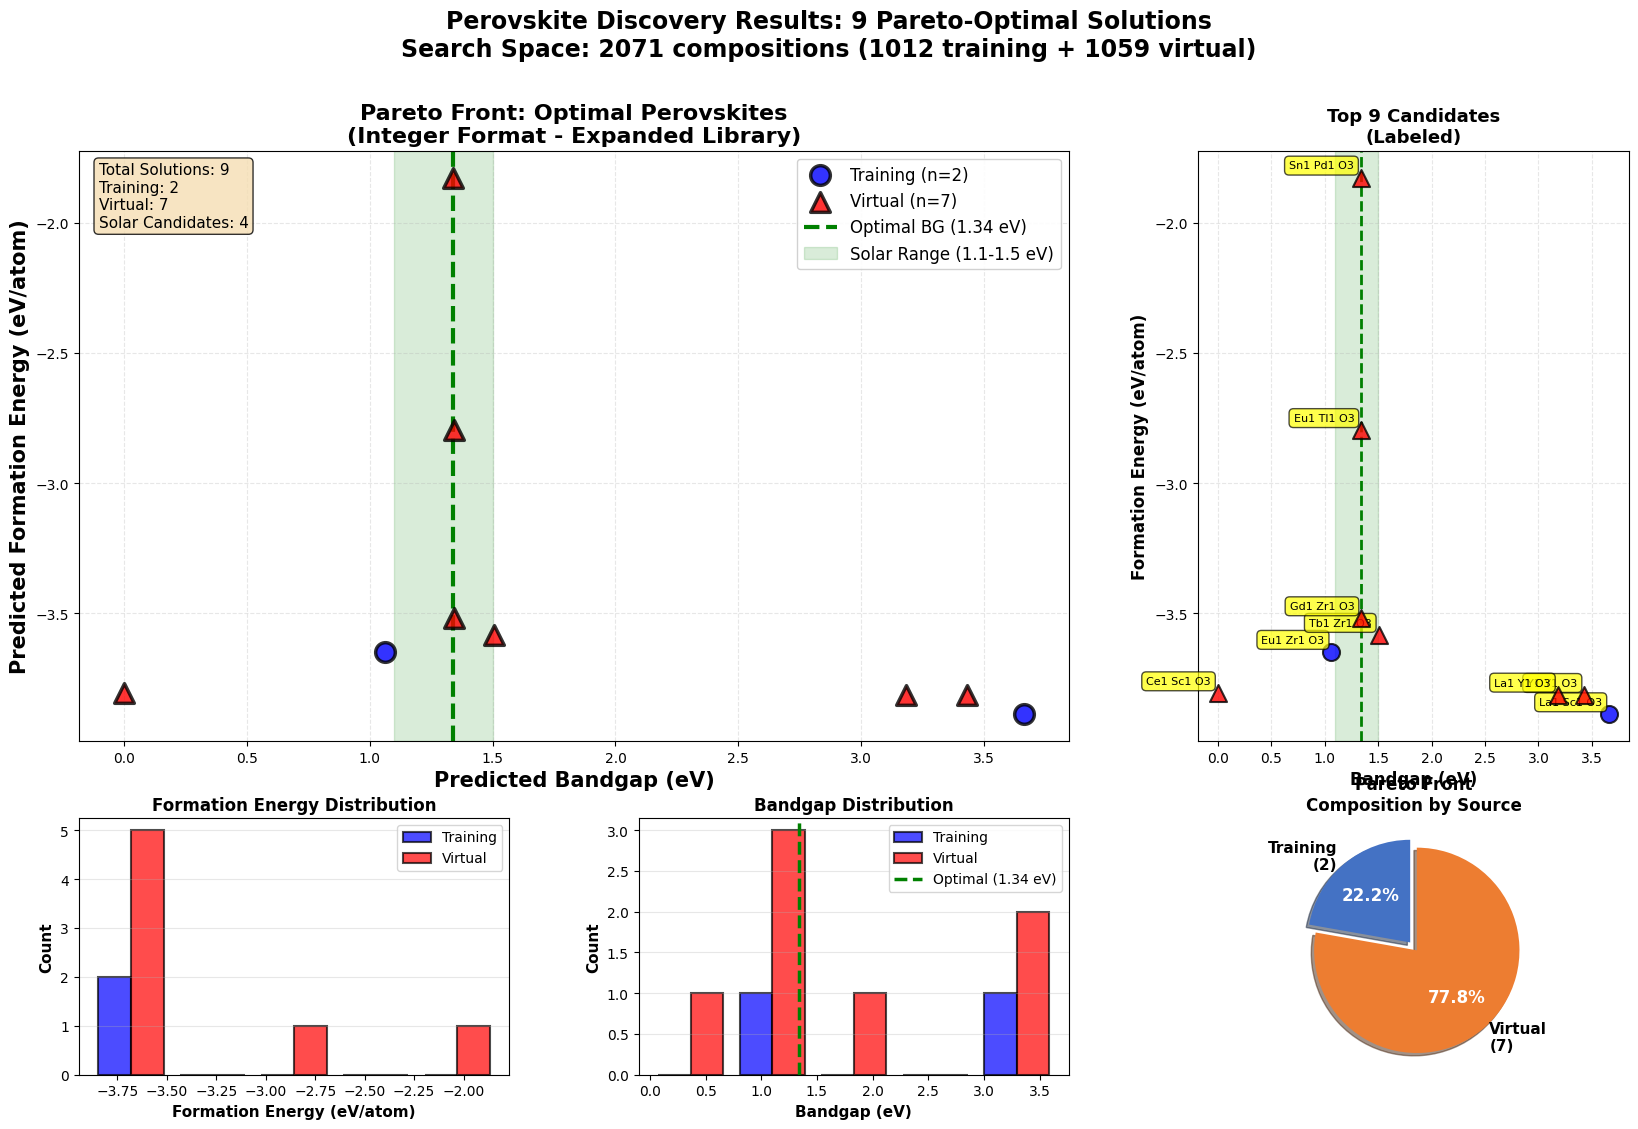


GENERATING SOLAR CELL CANDIDATES DETAILED PLOT
✅ Solar candidates plot saved: solar_cell_candidates_detailed.png


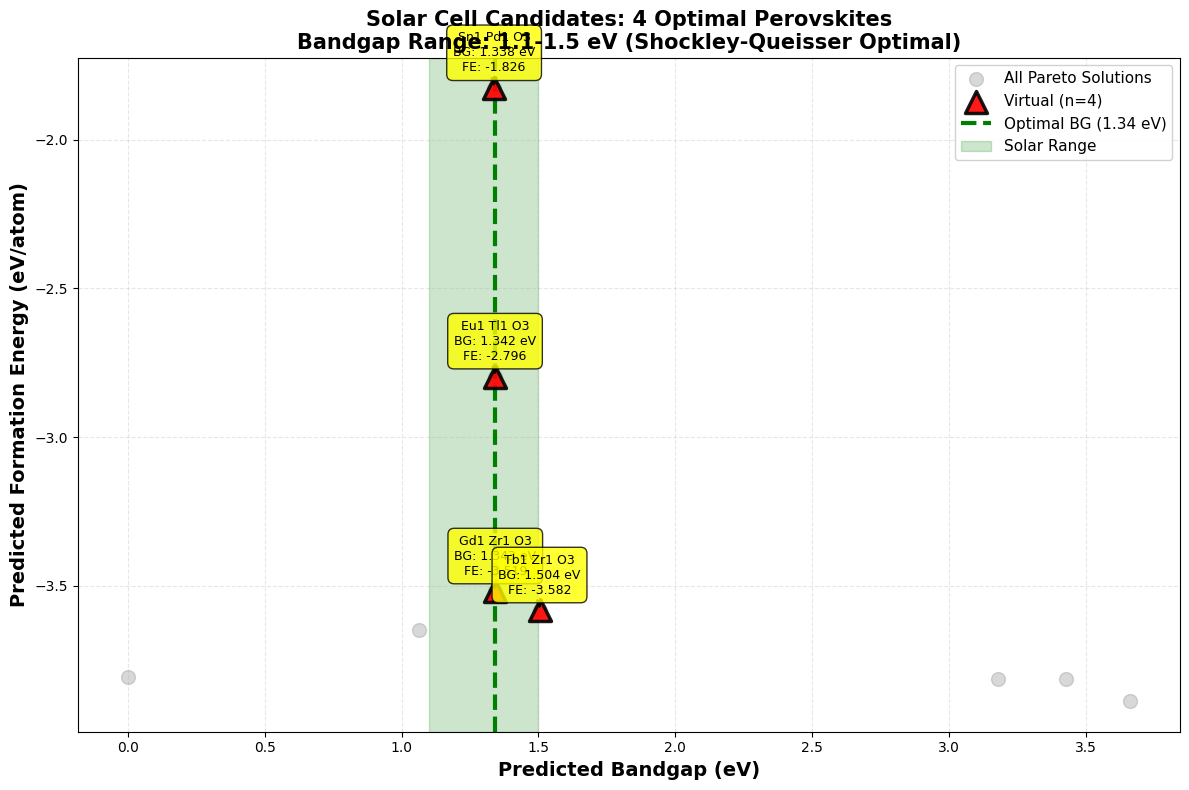


DETAILED ANALYSIS: SOLAR CELL CANDIDATES

🌟 RANKED BY BANDGAP DEVIATION FROM OPTIMAL (1.34 eV):

1. Sn1 Pd1 O3 ⭐⭐⭐
   Source: Virtual
   Bandgap: 1.3383 eV (deviation: 0.0017 eV)
   Formation Energy: -1.8264 eV/atom (Stability: Low)
   Recommendation: ⚠️ Requires validation

2. Eu1 Tl1 O3 ⭐⭐⭐
   Source: Virtual
   Bandgap: 1.3417 eV (deviation: 0.0017 eV)
   Formation Energy: -2.7961 eV/atom (Stability: Medium)
   Recommendation: ✅ TOP CANDIDATE!

3. Gd1 Zr1 O3 ⭐⭐⭐
   Source: Virtual
   Bandgap: 1.3426 eV (deviation: 0.0026 eV)
   Formation Energy: -3.5186 eV/atom (Stability: High)
   Recommendation: ✅ TOP CANDIDATE!

4. Tb1 Zr1 O3 ⭐
   Source: Virtual
   Bandgap: 1.5043 eV (deviation: 0.1643 eV)
   Formation Energy: -3.5825 eV/atom (Stability: High)
   Recommendation: ✓ Good candidate

📊 VISUALIZATION FILES GENERATED:
1. perovskite_expanded_integer_results.png
2. solar_cell_candidates_detailed.png
3. optimal_perovskites_expanded_integer.csv


In [19]:
# =============================================================================
# ADD VISUALIZATION TO YOUR RESULTS
# =============================================================================

print("\n" + "="*80)
print("GENERATING COMPREHENSIVE VISUALIZATION")
print("="*80)

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 12))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# =============================================================================
# PLOT 1: MAIN PARETO FRONT (Large)
# =============================================================================

ax1 = fig.add_subplot(gs[0:2, 0:2])

training_data = pareto_df[pareto_df['Source'] == 'Training']
virtual_data = pareto_df[pareto_df['Source'] == 'Virtual']

if len(training_data) > 0:
    ax1.scatter(training_data['Bandgap'], training_data['Formation_Energy'],
               c='blue', s=200, alpha=0.8, edgecolors='black', linewidth=2.5,
               label=f'Training (n={len(training_data)})', marker='o', zorder=3)

if len(virtual_data) > 0:
    ax1.scatter(virtual_data['Bandgap'], virtual_data['Formation_Energy'],
               c='red', s=200, alpha=0.8, edgecolors='black', linewidth=2.5,
               label=f'Virtual (n={len(virtual_data)})', marker='^', zorder=3)

# Optimal bandgap line
ax1.axvline(x=1.34, color='green', linestyle='--', linewidth=3, 
           label='Optimal BG (1.34 eV)', zorder=2)

# Solar range shading
ax1.axvspan(1.1, 1.5, alpha=0.15, color='green', label='Solar Range (1.1-1.5 eV)', zorder=1)

ax1.set_xlabel('Predicted Bandgap (eV)', fontsize=15, fontweight='bold')
ax1.set_ylabel('Predicted Formation Energy (eV/atom)', fontsize=15, fontweight='bold')
ax1.set_title('Pareto Front: Optimal Perovskites\n(Integer Format - Expanded Library)', 
             fontsize=16, fontweight='bold')
ax1.legend(loc='best', fontsize=12, framealpha=0.9)
ax1.grid(True, alpha=0.3, linestyle='--')

# Add text box with key metrics
textstr = f'Total Solutions: {len(pareto_df)}\nTraining: {n_train_pareto}\nVirtual: {n_virtual_pareto}\nSolar Candidates: {len(solar)}'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
ax1.text(0.02, 0.98, textstr, transform=ax1.transAxes, fontsize=11,
        verticalalignment='top', bbox=props)

# =============================================================================
# PLOT 2: TOP CANDIDATES WITH LABELS
# =============================================================================

ax2 = fig.add_subplot(gs[0:2, 2])

top_n = min(9, len(pareto_df))
top_candidates = pareto_df.head(top_n)

colors = ['blue' if src == 'Training' else 'red' for src in top_candidates['Source']]
markers = ['o' if src == 'Training' else '^' for src in top_candidates['Source']]

for i, (idx, row) in enumerate(top_candidates.iterrows()):
    ax2.scatter(row['Bandgap'], row['Formation_Energy'],
               c=colors[i], s=150, alpha=0.8, edgecolors='black',
               linewidth=1.5, marker=markers[i], zorder=3)
    
    # Add composition labels
    ax2.annotate(row['Composition'],
                (row['Bandgap'], row['Formation_Energy']),
                fontsize=8, ha='right', va='bottom',
                xytext=(-5, 5), textcoords='offset points',
                bbox=dict(boxstyle='round,pad=0.4', facecolor='yellow', alpha=0.7, edgecolor='black'))

ax2.axvline(x=1.34, color='green', linestyle='--', linewidth=2)
ax2.axvspan(1.1, 1.5, alpha=0.15, color='green')
ax2.set_xlabel('Bandgap (eV)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Formation Energy (eV/atom)', fontsize=12, fontweight='bold')
ax2.set_title(f'Top {top_n} Candidates\n(Labeled)', fontsize=13, fontweight='bold')
ax2.grid(True, alpha=0.3, linestyle='--')

# =============================================================================
# PLOT 3: FORMATION ENERGY DISTRIBUTION
# =============================================================================

ax3 = fig.add_subplot(gs[2, 0])

if len(training_data) > 0 and len(virtual_data) > 0:
    ax3.hist([training_data['Formation_Energy'], virtual_data['Formation_Energy']],
            bins=5, label=['Training', 'Virtual'], color=['blue', 'red'],
            alpha=0.7, edgecolor='black', linewidth=1.5)
elif len(training_data) > 0:
    ax3.hist(training_data['Formation_Energy'], bins=5, label='Training', 
            color='blue', alpha=0.7, edgecolor='black', linewidth=1.5)
elif len(virtual_data) > 0:
    ax3.hist(virtual_data['Formation_Energy'], bins=5, label='Virtual', 
            color='red', alpha=0.7, edgecolor='black', linewidth=1.5)

ax3.set_xlabel('Formation Energy (eV/atom)', fontsize=11, fontweight='bold')
ax3.set_ylabel('Count', fontsize=11, fontweight='bold')
ax3.set_title('Formation Energy Distribution', fontsize=12, fontweight='bold')
ax3.legend(fontsize=10)
ax3.grid(True, alpha=0.3, axis='y')

# =============================================================================
# PLOT 4: BANDGAP DISTRIBUTION
# =============================================================================

ax4 = fig.add_subplot(gs[2, 1])

if len(training_data) > 0 and len(virtual_data) > 0:
    ax4.hist([training_data['Bandgap'], virtual_data['Bandgap']],
            bins=5, label=['Training', 'Virtual'], color=['blue', 'red'],
            alpha=0.7, edgecolor='black', linewidth=1.5)
elif len(training_data) > 0:
    ax4.hist(training_data['Bandgap'], bins=5, label='Training', 
            color='blue', alpha=0.7, edgecolor='black', linewidth=1.5)
elif len(virtual_data) > 0:
    ax4.hist(virtual_data['Bandgap'], bins=5, label='Virtual', 
            color='red', alpha=0.7, edgecolor='black', linewidth=1.5)

ax4.axvline(x=1.34, color='green', linestyle='--', linewidth=2.5, label='Optimal (1.34 eV)')
ax4.set_xlabel('Bandgap (eV)', fontsize=11, fontweight='bold')
ax4.set_ylabel('Count', fontsize=11, fontweight='bold')
ax4.set_title('Bandgap Distribution', fontsize=12, fontweight='bold')
ax4.legend(fontsize=10)
ax4.grid(True, alpha=0.3, axis='y')

# =============================================================================
# PLOT 5: SOURCE COMPOSITION PIE CHART
# =============================================================================

ax5 = fig.add_subplot(gs[2, 2])

sizes = [n_train_pareto, n_virtual_pareto]
labels = [f'Training\n({n_train_pareto})', f'Virtual\n({n_virtual_pareto})']
colors_pie = ['#4472C4', '#ED7D31']  # Blue and Orange
explode = (0.05, 0.05)

wedges, texts, autotexts = ax5.pie(sizes, explode=explode, labels=labels, colors=colors_pie,
        autopct='%1.1f%%', shadow=True, startangle=90,
        textprops={'fontsize': 11, 'fontweight': 'bold'})

# Make percentage text white for better visibility
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(12)
    autotext.set_fontweight('bold')

ax5.set_title('Pareto Front\nComposition by Source', fontsize=12, fontweight='bold')

# =============================================================================
# OVERALL TITLE
# =============================================================================

fig.suptitle(f'Perovskite Discovery Results: {len(pareto_df)} Pareto-Optimal Solutions\n' + 
            f'Search Space: {n_total} compositions ({n_training} training + {n_virtual} virtual)',
            fontsize=17, fontweight='bold', y=0.998)

# Save figure
plt.savefig('perovskite_expanded_integer_results.png', dpi=300, bbox_inches='tight', facecolor='white')
print("\n✅ Visualization saved: perovskite_expanded_integer_results.png")

plt.show()

# =============================================================================
# ADDITIONAL: DETAILED SOLAR CANDIDATES PLOT
# =============================================================================

if len(solar) > 0:
    print("\n" + "="*80)
    print("GENERATING SOLAR CELL CANDIDATES DETAILED PLOT")
    print("="*80)
    
    fig2, ax = plt.subplots(figsize=(12, 8))
    
    # Plot all Pareto solutions (faded)
    ax.scatter(pareto_df['Bandgap'], pareto_df['Formation_Energy'],
              c='gray', s=100, alpha=0.3, label='All Pareto Solutions')
    
    # Highlight solar candidates
    solar_train = solar[solar['Source'] == 'Training']
    solar_virt = solar[solar['Source'] == 'Virtual']
    
    if len(solar_train) > 0:
        ax.scatter(solar_train['Bandgap'], solar_train['Formation_Energy'],
                  c='blue', s=250, alpha=0.9, edgecolors='black', linewidth=2.5,
                  label=f'Training (n={len(solar_train)})', marker='o', zorder=3)
    
    if len(solar_virt) > 0:
        ax.scatter(solar_virt['Bandgap'], solar_virt['Formation_Energy'],
                  c='red', s=250, alpha=0.9, edgecolors='black', linewidth=2.5,
                  label=f'Virtual (n={len(solar_virt)})', marker='^', zorder=3)
    
    # Add labels for each solar candidate
    for idx, row in solar.iterrows():
        ax.annotate(f"{row['Composition']}\nBG: {row['Bandgap']:.3f} eV\nFE: {row['Formation_Energy']:.3f}",
                   (row['Bandgap'], row['Formation_Energy']),
                   fontsize=9, ha='center', va='bottom',
                   xytext=(0, 10), textcoords='offset points',
                   bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.8, edgecolor='black'),
                   arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0', lw=1.5))
    
    # Optimal bandgap and solar range
    ax.axvline(x=1.34, color='green', linestyle='--', linewidth=3, label='Optimal BG (1.34 eV)', zorder=2)
    ax.axvspan(1.1, 1.5, alpha=0.2, color='green', label='Solar Range', zorder=1)
    
    ax.set_xlabel('Predicted Bandgap (eV)', fontsize=14, fontweight='bold')
    ax.set_ylabel('Predicted Formation Energy (eV/atom)', fontsize=14, fontweight='bold')
    ax.set_title(f'Solar Cell Candidates: {len(solar)} Optimal Perovskites\n' + 
                'Bandgap Range: 1.1-1.5 eV (Shockley-Queisser Optimal)',
                fontsize=15, fontweight='bold')
    ax.legend(loc='best', fontsize=11, framealpha=0.9)
    ax.grid(True, alpha=0.3, linestyle='--')
    
    plt.tight_layout()
    plt.savefig('solar_cell_candidates_detailed.png', dpi=300, bbox_inches='tight', facecolor='white')
    print("✅ Solar candidates plot saved: solar_cell_candidates_detailed.png")
    plt.show()

# =============================================================================
# SUMMARY TABLE WITH HIGHLIGHTING
# =============================================================================

print("\n" + "="*80)
print("DETAILED ANALYSIS: SOLAR CELL CANDIDATES")
print("="*80)

if len(solar) > 0:
    print("\n🌟 RANKED BY BANDGAP DEVIATION FROM OPTIMAL (1.34 eV):\n")
    
    for i, (idx, row) in enumerate(solar.iterrows(), 1):
        stars = "⭐⭐⭐" if row['BG_Deviation'] < 0.01 else "⭐⭐" if row['BG_Deviation'] < 0.05 else "⭐"
        stability = "High" if row['Formation_Energy'] < -3.0 else "Medium" if row['Formation_Energy'] < -2.5 else "Low"
        
        print(f"{i}. {row['Composition']} {stars}")
        print(f"   Source: {row['Source']}")
        print(f"   Bandgap: {row['Bandgap']:.4f} eV (deviation: {row['BG_Deviation']:.4f} eV)")
        print(f"   Formation Energy: {row['Formation_Energy']:.4f} eV/atom (Stability: {stability})")
        print(f"   Recommendation: {'✅ TOP CANDIDATE!' if row['BG_Deviation'] < 0.01 and row['Formation_Energy'] < -2.5 else '⚠️ Requires validation' if row['Formation_Energy'] > -2.0 else '✓ Good candidate'}")
        print()

print("="*80)
print("📊 VISUALIZATION FILES GENERATED:")
print("="*80)
print("1. perovskite_expanded_integer_results.png")
print("2. solar_cell_candidates_detailed.png")
print("3. optimal_perovskites_expanded_integer.csv")
print("="*80)

In [ ]:
#---------------------------------------------------------------------------------------------------------------------------------

In [18]:
# =============================================================================
# PEROVSKITE NSGA-II OPTIMIZATION — FIXED VERSION
# - Ensures X_virtual_aligned is numpy array (no Pandas KeyError)
# - Handles DEAP selTournamentDCD crowding distance & rank issue
# - Caches predictions and aligns features
# Author: DHARSHANKUMAAR (modified)
# Date: 2025-10-24
# =============================================================================

import random, os, subprocess, datetime, warnings, joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from deap import base, creator, tools
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix

warnings.filterwarnings('ignore')
RANDOM_SEED = 42
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

OUT_DIR = "nsga2_results"
os.makedirs(OUT_DIR, exist_ok=True)

# --- CBFV ---
try:
    import CBFV
except Exception:
    subprocess.check_call(['pip', 'install', 'CBFV', '--quiet'])
from CBFV import composition

# ---- Load training data ----
odf = pd.read_csv("/kaggle/input/magpie-perov/CBFV_magpie_extracted_features.csv")
training_comps_set = set(odf['composition'].tolist())
all_feature_cols = [c for c in odf.columns
                    if c not in ['composition', 'formation_energy (eV/atom)', 'band_gap (eV)']]
X_train = odf[all_feature_cols].values
actual_train_comps = list(odf['composition'].values)
y_fe_train_actual = odf['formation_energy (eV/atom)'].values
y_bg_train_actual = odf['band_gap (eV)'].values

# ---- Virtual library ----
A_SITE_ELEMENTS = ['Ca','Sr','Ba','La','Ce','Pr','Nd','Pm','Sm','Eu','Gd','Tb','Dy','Ho','Er','Tm','Yb','Lu','Y','Sc','K','Rb','Cs','Pb','Bi','Tl','Mg','Cd','Hg','Sn','In']
B_SITE_ELEMENTS = ['Ti','Zr','Hf','V','Nb','Ta','Cr','Mo','W','Mn','Tc','Re','Fe','Ru','Os','Co','Rh','Ir','Ni','Pd','Pt','Cu','Ag','Au','Zn','Cd','Hg','Al','Ga','In','Tl','Si','Ge','Sn','Pb','Sc','Y','Bi','Sb']

virtual_compositions = []
for A in A_SITE_ELEMENTS:
    for B in B_SITE_ELEMENTS:
        comp = f"{A}1 {B}1 O3"
        if comp not in training_comps_set:
            virtual_compositions.append(comp)

# ---- Featurize virtual set ----
if len(virtual_compositions) > 0:
    df_virtual = pd.DataFrame({'formula': virtual_compositions, 'target':[0.0]*len(virtual_compositions)})
    X_virtual, y_virtual, formulae_virtual, skipped = composition.generate_features(
        df_virtual, elem_prop='magpie', drop_duplicates=False, extend_features=True, sum_feat=True
    )
    # Align shapes
    if X_virtual.shape[1] == X_train.shape[1]:
        X_virtual_aligned = X_virtual
    elif X_virtual.shape[1] < X_train.shape[1]:
        X_virtual_aligned = np.zeros((X_virtual.shape[0], X_train.shape[1]))
        X_virtual_aligned[:, :X_virtual.shape[1]] = X_virtual
    else:
        X_virtual_aligned = X_virtual[:, :X_train.shape[1]]
    X_virtual_aligned = np.array(X_virtual_aligned)  # <--- FIX: ensure numpy array
    formulae_virtual_list = list(formulae_virtual)
else:
    X_virtual_aligned = np.empty((0, X_train.shape[1]))
    formulae_virtual_list = []
    skipped = []

# ---- Load models ----
model_fe = joblib.load('/kaggle/input/fe-checks-new/best_model_CatBoost (1).pkl')
scaler_X_fe = joblib.load('/kaggle/input/fe-checks-new/scaler_X_fe.pkl')
scaler_y_fe = joblib.load('/kaggle/input/fe-checks-new/scaler_y_fe.pkl')
features_fe = joblib.load('/kaggle/input/fe-checks-new/selected_features_fe.pkl')

clf_metal = joblib.load('/kaggle/input/bg-new/classifier_metal_nonmetal.pkl')
reg_bg = joblib.load('/kaggle/input/bg-new/regressor_bandgap_nonmetal.pkl')
scaler_X_bg = joblib.load('/kaggle/input/bg-new/scaler_X_bg_reg.pkl')
scaler_y_bg = joblib.load('/kaggle/input/bg-new/scaler_y_bg_reg.pkl')
features_clf = joblib.load('/kaggle/input/bg-new/features_classifier.pkl')
features_reg = joblib.load('/kaggle/input/bg-new/features_regressor.pkl')

# ---- Feature to indices ----
def features_to_indices(feat_list, all_cols):
    if len(feat_list)==0: return np.array([],dtype=int)
    if isinstance(feat_list[0], (int,np.integer)): return np.array(feat_list,dtype=int)
    idxs=[]
    for f in feat_list:
        f_str = str(f)
        if f_str in all_cols: idxs.append(all_cols.index(f_str))
        else: raise KeyError(f"Feature '{f}' not found in all_feature_cols")
    return np.array(idxs,dtype=int)

sel_idx_fe = features_to_indices(features_fe, all_feature_cols)
sel_idx_clf = features_to_indices(features_clf, all_feature_cols)
sel_idx_reg = features_to_indices(features_reg, all_feature_cols)

# ---- Prediction with caching ----
n_train = X_train.shape[0]
n_virtual = X_virtual_aligned.shape[0]
n_total = n_train + n_virtual
_source_labels = ['Training']*n_train + ['Virtual']*n_virtual
_actual_compositions = actual_train_comps + formulae_virtual_list
_pred_cache = {}

def predict_by_index(idx):
    key=('idx',int(idx))
    if key in _pred_cache: return _pred_cache[key]
    if idx<n_train: feat=X_train[int(idx)]
    else: feat=X_virtual_aligned[int(idx-n_train)]
    feat_row = np.asarray(feat).reshape(1,-1)

    # FE
    X_fe_selected = feat_row[:,sel_idx_fe] if sel_idx_fe.size>0 else feat_row
    X_fe_scaled = scaler_X_fe.transform(X_fe_selected)
    fe_scaled = model_fe.predict(X_fe_scaled)
    fe_pred = float(scaler_y_fe.inverse_transform(fe_scaled.reshape(-1,1))[0,0])

    # BG classifier/regressor
    X_clf = feat_row[:,sel_idx_clf] if sel_idx_clf.size>0 else feat_row
    is_metal = bool(clf_metal.predict(X_clf)[0])

    if is_metal:
        bg_pred=0.0
    else:
        X_reg = feat_row[:,sel_idx_reg] if sel_idx_reg.size>0 else feat_row
        X_reg_scaled = scaler_X_bg.transform(X_reg)
        bg_scaled = reg_bg.predict(X_reg_scaled)
        bg_pred = float(scaler_y_bg.inverse_transform(bg_scaled.reshape(-1,1))[0,0])
        if bg_pred<0: bg_pred=0.0

    _pred_cache[key]=(fe_pred,bg_pred,is_metal)
    return _pred_cache[key]

# ---- Model provenance check ----
y_fe_pred_train=np.zeros(n_train)
y_bg_pred_train=np.zeros(n_train)
y_clf_pred_train=np.zeros(n_train,dtype=bool)
for i in range(n_train):
    fe,bg,is_m=predict_by_index(i)
    y_fe_pred_train[i]=fe
    y_bg_pred_train[i]=bg
    y_clf_pred_train[i]=is_m

fe_rmse = np.sqrt(mean_squared_error(y_fe_train_actual,y_fe_pred_train))
fe_r2 = r2_score(y_fe_train_actual,y_fe_pred_train)
true_is_metal=(y_bg_train_actual==0.0)
clf_acc=accuracy_score(true_is_metal,y_clf_pred_train)
clf_cm=confusion_matrix(true_is_metal,y_clf_pred_train)
nonmetal_mask=~true_is_metal
if nonmetal_mask.sum()>0:
    bg_rmse_nonmetal=np.sqrt(mean_squared_error(y_bg_train_actual[nonmetal_mask],y_bg_pred_train[nonmetal_mask]))
    bg_r2_nonmetal=r2_score(y_bg_train_actual[nonmetal_mask],y_bg_pred_train[nonmetal_mask])
else:
    bg_rmse_nonmetal=np.nan
    bg_r2_nonmetal=np.nan

print("MODEL PROVENANCE CHECK (training set):")
print(f"  FE RMSE: {fe_rmse:.4f} eV/atom  R2: {fe_r2:.4f}")
print(f"  BG classifier accuracy: {clf_acc:.4f}")
print(f"  BG reg (nonmetal) RMSE: {bg_rmse_nonmetal:.4f}  R2: {bg_r2_nonmetal:.4f}")
print("  Confusion matrix (rows=true, cols=pred):")
print(clf_cm)

# ---- Combine features ----
all_features = np.vstack([X_train, X_virtual_aligned])

# ---- NSGA-II ----
try:
    del creator.FitnessMulti
    del creator.Individual
except Exception: pass
creator.create("FitnessMulti", base.Fitness, weights=(-1.0,-1.0))
creator.create("Individual", list, fitness=creator.FitnessMulti)

toolbox=base.Toolbox()
toolbox.register("attr_idx", random.randint, 0, n_total-1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_idx, n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

def evaluate(ind):
    fe,bg,_=predict_by_index(int(ind[0]))
    return fe, abs(bg-1.34)
toolbox.register("evaluate", evaluate)

def mate_index(ind1,ind2):
    if random.random()<0.5: ind1[0],ind2[0]=ind2[0],ind1[0]
    return ind1,ind2
def mutate_index(ind,indpb):
    if random.random()<indpb: ind[0]=random.randint(0,n_total-1)
    return ind,
toolbox.register("mate", mate_index)
toolbox.register("mutate", mutate_index, indpb=0.3)
toolbox.register("select_parents", tools.selTournamentDCD)
toolbox.register("select_survivors", tools.selNSGA2)

# ---- Helper: assign rank and crowding distance (DEAP selTournamentDCD expects these) ----
def assign_rank_and_crowding(population, obj_count=2):
    """
    Assigns fitness.rank and fitness.crowding_dist to individuals in population.
    This mirrors the information selTournamentDCD expects (rank + crowding_dist).
    We compute nondominated fronts, assign rank per-front, and compute crowding distances
    per front for `obj_count` objectives.
    """
    if len(population) == 0:
        return

    # Nondominated sorting; returns list of fronts
    fronts = tools.sortNondominated(population, k=len(population), first_front_only=False)

    for rank, front in enumerate(fronts):
        # assign rank
        for ind in front:
            ind.fitness.rank = rank

        # initialize crowding distance
        n = len(front)
        if n == 0:
            continue
        for ind in front:
            ind.fitness.crowding_dist = 0.0

        # for each objective, sort and accumulate normalized distances
        for m in range(obj_count):
            front_sorted = sorted(front, key=lambda ind: ind.fitness.values[m])
            # set extremes to infinity
            front_sorted[0].fitness.crowding_dist = float('inf')
            front_sorted[-1].fitness.crowding_dist = float('inf')
            f_min = front_sorted[0].fitness.values[m]
            f_max = front_sorted[-1].fitness.values[m]
            if f_max == f_min:
                # all equal, skip this objective
                continue
            for i in range(1, n-1):
                prev_val = front_sorted[i-1].fitness.values[m]
                next_val = front_sorted[i+1].fitness.values[m]
                # normalized difference
                front_sorted[i].fitness.crowding_dist += (next_val - prev_val) / (f_max - f_min)

# ---- Evolution ----
pop_size=500; n_generations=100; cxpb=0.7; mutpb=0.3
population=toolbox.population(n=pop_size)
for ind in population:
    ind.fitness.values=toolbox.evaluate(ind)

# initial assignment (so selTournamentDCD can use fitness.rank and fitness.crowding_dist)
assign_rank_and_crowding(population, obj_count=2)

for gen in range(n_generations):
    # Ensure rank and crowding distance are assigned before parent selection
    assign_rank_and_crowding(population, obj_count=2)
    parents=toolbox.select_parents(population,pop_size)
    offspring=list(map(toolbox.clone,parents))
    # crossover
    for i in range(0,pop_size,2):
        if random.random()<cxpb and i+1<pop_size:
            toolbox.mate(offspring[i],offspring[i+1])
            try:
                del offspring[i].fitness.values
            except Exception:
                pass
            try:
                del offspring[i+1].fitness.values
            except Exception:
                pass
    # mutation
    for ind in offspring:
        if random.random()<mutpb:
            toolbox.mutate(ind)
            try:
                del ind.fitness.values
            except Exception:
                pass
    # evaluate
    for ind in offspring:
        if not ind.fitness.valid:
            ind.fitness.values=toolbox.evaluate(ind)
    # survivors selection (NSGA-II)
    population=toolbox.select_survivors(population+offspring,pop_size)
    if gen%10==0 or gen==n_generations-1:
        fits=np.array([ind.fitness.values for ind in population])
        print(f"Gen {gen:3d} | Min FE: {fits[:,0].min():7.4f} | Min BG Dev: {fits[:,1].min():6.4f}")

# ---- Extract Pareto ----
pareto_front = tools.sortNondominated(population,k=len(population),first_front_only=True)[0]
unique=[]
seen=set()
for ind in pareto_front:
    idx=int(ind[0])
    if idx not in seen: unique.append(idx); seen.add(idx)

pareto_results=[]
for idx in unique:
    fe,bg,is_m=predict_by_index(idx)
    pareto_results.append({'Index':idx,'Composition':_actual_compositions[idx],
                           'Source':_source_labels[idx],'Formation_Energy':fe,'Bandgap':bg,
                           'BG_Deviation':abs(bg-1.34),'Is_Metal_Pred':is_m})
pareto_df=pd.DataFrame(pareto_results).sort_values(['Formation_Energy','BG_Deviation']).reset_index(drop=True)

pareto_csv=os.path.join(OUT_DIR,'optimal_perovskites_expanded_integer.csv')
pareto_df.to_csv(pareto_csv,index=False)

# Solar candidates
solar=pareto_df[(pareto_df['Bandgap']>=1.1)&(pareto_df['Bandgap']<=1.7)].sort_values('BG_Deviation')
solar_csv=os.path.join(OUT_DIR,'solar_candidates.csv')
solar.to_csv(solar_csv,index=False)

print(f"Pareto front saved to: {pareto_csv}")
print(f"Solar candidates saved to: {solar_csv}")

Processing Input Data: 100%|██████████| 1059/1059 [00:00<00:00, 25575.61it/s]


	Featurizing Compositions...


Assigning Features...: 100%|██████████| 1059/1059 [00:00<00:00, 10463.21it/s]


	Creating Pandas Objects...
MODEL PROVENANCE CHECK (training set):
  FE RMSE: 0.1065 eV/atom  R2: 0.9885
  BG classifier accuracy: 0.9704
  BG reg (nonmetal) RMSE: 0.5262  R2: 0.8800
  Confusion matrix (rows=true, cols=pred):
[[515  19]
 [ 11 467]]
Gen   0 | Min FE: -3.8873 | Min BG Dev: 0.0019
Gen  10 | Min FE: -3.8873 | Min BG Dev: 0.0019
Gen  20 | Min FE: -3.8873 | Min BG Dev: 0.0017
Gen  30 | Min FE: -3.8873 | Min BG Dev: 0.0017
Gen  40 | Min FE: -3.8873 | Min BG Dev: 0.0017
Gen  50 | Min FE: -3.8873 | Min BG Dev: 0.0017
Gen  60 | Min FE: -3.8873 | Min BG Dev: 0.0017
Gen  70 | Min FE: -3.8873 | Min BG Dev: 0.0017
Gen  80 | Min FE: -3.8873 | Min BG Dev: 0.0017
Gen  90 | Min FE: -3.8873 | Min BG Dev: 0.0017
Gen  99 | Min FE: -3.8873 | Min BG Dev: 0.0017
Pareto front saved to: nsga2_results/optimal_perovskites_expanded_integer.csv
Solar candidates saved to: nsga2_results/solar_candidates.csv


Pareto front total: 9
Source
Virtual     7
Training    2
Name: count, dtype: int64

Top 10 Pareto results (all):
   Index Composition    Source  Formation_Energy   Bandgap  BG_Deviation  \
0    862  La1 Sc1 O3  Training         -3.887292  3.661842      2.321842   
1   1622    Y1 Y1 O3   Virtual         -3.813223  3.429045      2.089045   
2   1112   La1 Y1 O3   Virtual         -3.811906  3.180305      1.840305   
3   1149  Ce1 Sc1 O3   Virtual         -3.806743  0.000000      1.340000   
4    423  Eu1 Zr1 O3  Training         -3.647683  1.063362      0.276638   
5   1350  Tb1 Zr1 O3   Virtual         -3.582456  1.504308      0.164308   
6   1316  Gd1 Zr1 O3   Virtual         -3.518614  1.342629      0.002629   
7   1306  Eu1 Tl1 O3   Virtual         -2.796055  1.341705      0.001705   
8   2012  Sn1 Pd1 O3   Virtual         -1.826419  1.338315      0.001685   

   Is_Metal_Pred  
0          False  
1          False  
2          False  
3           True  
4          False  
5          F

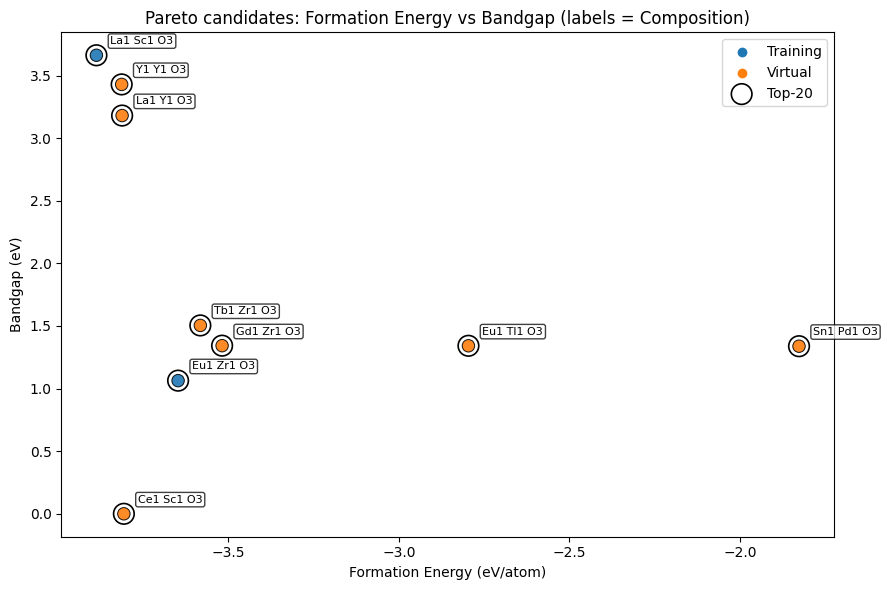

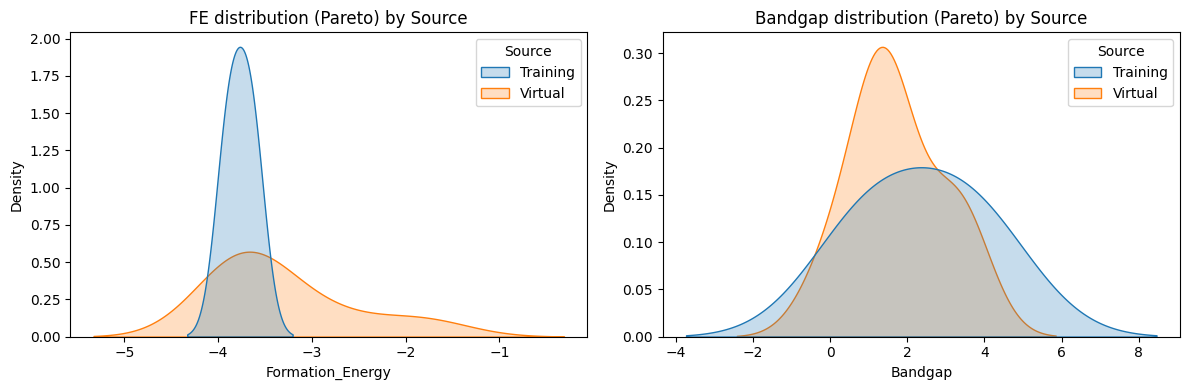

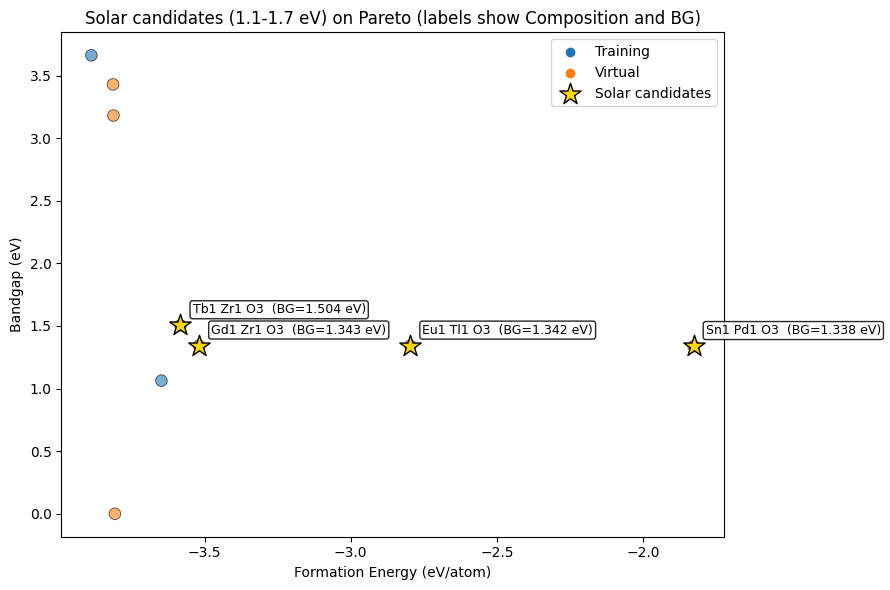

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

OUT_DIR = "nsga2_results"
pareto_csv = os.path.join(OUT_DIR, 'optimal_perovskites_expanded_integer.csv')
solar_csv = os.path.join(OUT_DIR, 'solar_candidates.csv')

pareto = pd.read_csv(pareto_csv)
solar = pd.read_csv(solar_csv)

# Quick summary counts
print("Pareto front total:", len(pareto))
print(pareto['Source'].value_counts())

# Show top 10 Pareto (sorted already by FE then BG dev)
print("\nTop 10 Pareto results (all):")
print(pareto.head(10)[['Index','Composition','Source','Formation_Energy','Bandgap','BG_Deviation','Is_Metal_Pred']])

# Top from Training vs Virtual
#print("\nTop Training candidates (first 10):")
#print(pareto[pareto['Source']=='Training'].head(10)[['Index','Composition','Formation_Energy','Bandgap']])

#print("\nTop Virtual candidates (first 10):")
#print(pareto[pareto['Source']=='Virtual'].head(10)[['Index','Composition','Formation_Energy','Bandgap']])

# Solar candidates quick view
print("\nSolar candidates (bandgap 1.1-1.7):", len(solar))
print(solar[['Index','Composition','Source','Formation_Energy','Bandgap']].head(20))

# --- Annotated visualizations (replace previous plotting block) ---
import numpy as np

# Helper to annotate a DataFrame of points
def annotate_points(ax, df, text_col='Composition', xy_cols=('Formation_Energy','Bandgap'),
                    fontsize=8, offset=(0.015, 0.015), bbox_alpha=0.75):
    xcol,ycol = xy_cols
    x_range = df[xcol].max() - df[xcol].min() if df[xcol].max()!=df[xcol].min() else 1.0
    y_range = df[ycol].max() - df[ycol].min() if df[ycol].max()!=df[ycol].min() else 1.0
    for i, row in df.iterrows():
        x = row[xcol]; y = row[ycol]
        # offset in data coordinates (small fraction)
        dx = offset[0] * x_range
        dy = offset[1] * y_range
        ax.annotate(str(row[text_col]),
                    xy=(x,y), xytext=(x+dx, y+dy),
                    fontsize=fontsize,
                    bbox=dict(boxstyle="round,pad=0.2", fc="white", alpha=bbox_alpha),
                    ha='left', va='bottom')

# Visualization 1: FE vs BG scatter with Source color and Pareto labeled
plt.figure(figsize=(9,6))
ax = sns.scatterplot(data=pareto, x='Formation_Energy', y='Bandgap', hue='Source', s=80, alpha=0.9, edgecolor='k')
# Highlight Top-N by FE then BG (top 20 or all if less)
topN = pareto.sort_values(['Formation_Energy','BG_Deviation']).head(20)
plt.scatter(topN['Formation_Energy'], topN['Bandgap'], facecolors='none', edgecolors='black', s=220, linewidths=1.2, label='Top-20', zorder=5)
annotate_points(ax, pareto, fontsize=8, offset=(0.02,0.02))
plt.xlabel('Formation Energy (eV/atom)')
plt.ylabel('Bandgap (eV)')
plt.title('Pareto candidates: Formation Energy vs Bandgap (labels = Composition)')
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(OUT_DIR,'pareto_FE_vs_BG_labeled.png'), dpi=220)
plt.show()

# Visualization 2: Distribution comparison (FE and BG) by Source (no point labels, but clearer titles)
fig, axes = plt.subplots(1,2,figsize=(12,4))
sns.kdeplot(data=pareto, x='Formation_Energy', hue='Source', ax=axes[0], fill=True, common_norm=False)
axes[0].set_title('FE distribution (Pareto) by Source')
sns.kdeplot(data=pareto, x='Bandgap', hue='Source', ax=axes[1], fill=True, common_norm=False)
axes[1].set_title('Bandgap distribution (Pareto) by Source')
plt.tight_layout()
plt.savefig(os.path.join(OUT_DIR,'pareto_distributions.png'), dpi=200)
plt.show()

# Visualization 3: Solar candidates highlighted and labeled
if len(solar)>0:
    plt.figure(figsize=(9,6))
    ax2 = sns.scatterplot(data=pareto, x='Formation_Energy', y='Bandgap', hue='Source', s=70, alpha=0.6, edgecolor='k')
    # solar stars
    plt.scatter(solar['Formation_Energy'], solar['Bandgap'], color='gold', edgecolor='k', s=260, marker='*', label='Solar candidates', zorder=6)
    # Annotate solar candidates with Composition and Bandgap value
    solar_annot = solar.copy()
    solar_annot['label'] = solar_annot['Composition'] + "  (BG=" + solar_annot['Bandgap'].round(3).astype(str) + " eV)"
    for i,row in solar_annot.iterrows():
        x=row['Formation_Energy']; y=row['Bandgap']
        dx = 0.02 * (pareto['Formation_Energy'].max()-pareto['Formation_Energy'].min())
        dy = 0.02 * (pareto['Bandgap'].max()-pareto['Bandgap'].min())
        ax2.annotate(row['label'], xy=(x,y), xytext=(x+dx, y+dy),
                     fontsize=9,
                     bbox=dict(boxstyle="round,pad=0.2", fc="white", alpha=0.85),
                     ha='left', va='bottom')
    plt.xlabel('Formation Energy (eV/atom)')
    plt.ylabel('Bandgap (eV)')
    plt.title('Solar candidates (1.1-1.7 eV) on Pareto (labels show Composition and BG)')
    plt.legend()
    plt.tight_layout()
    plt.savefig(os.path.join(OUT_DIR,'solar_on_pareto_labeled.png'), dpi=220)
    plt.show()
else:
    print("No solar-range candidates found in solar_candidates.csv")

In [20]:
import os
import pandas as pd

OUT_DIR = "nsga2_results"
os.makedirs(OUT_DIR, exist_ok=True)

# Assumes these variables exist from your script:
# - all_feature_cols (list of feature column names)
# - X_virtual_aligned (numpy array, shape: n_virtual x n_features_aligned)
# - formulae_virtual_list (list of formulas for virtual set)
# - skipped (list of skipped formulas)
# - n_train (number of training rows)
# - predict_by_index(idx) function available (returns fe, bg, is_metal)

# Build features DataFrame for virtual set
df_virtual_features = pd.DataFrame(X_virtual_aligned, columns=all_feature_cols)
df_virtual_features.insert(0, "composition", formulae_virtual_list)

# Build predictions for virtual set
preds = []
n_virtual = X_virtual_aligned.shape[0]
for i in range(n_virtual):
    global_idx = n_train + i
    fe, bg, is_metal = predict_by_index(global_idx)
    preds.append({
        "composition": formulae_virtual_list[i],
        "global_index": int(global_idx),
        "FE_pred_eV_per_atom": fe,
        "Bandgap_pred_eV": bg,
        "BG_deviation_from_1.34": abs(bg - 1.34),
        "Is_Metal_Pred": bool(is_metal),
        "Source": "Virtual"
    })
df_virtual_preds = pd.DataFrame(preds)

# Save to a single Excel workbook with multiple sheets
excel_path = os.path.join(OUT_DIR, "virtual_library_with_features_and_predictions.xlsx")
with pd.ExcelWriter(excel_path, engine="openpyxl") as writer:
    df_virtual_features.to_excel(writer, sheet_name="virtual_features", index=False)
    df_virtual_preds.to_excel(writer, sheet_name="predictions", index=False)
    # skipped formulas (if any)
    pd.DataFrame({"skipped_formula": skipped}).to_excel(writer, sheet_name="skipped", index=False)

print(f"Saved virtual features + predictions to: {excel_path}")

# Also save quick CSV copies if you prefer
df_virtual_features.to_csv(os.path.join(OUT_DIR, "virtual_features.csv"), index=False)
df_virtual_preds.to_csv(os.path.join(OUT_DIR, "virtual_predictions.csv"), index=False)
print("Also saved CSVs: virtual_features.csv and virtual_predictions.csv")

Saved virtual features + predictions to: nsga2_results/virtual_library_with_features_and_predictions.xlsx
Also saved CSVs: virtual_features.csv and virtual_predictions.csv


In [21]:
# Recommended param tweaks
pop_size = 800     # was 500
n_generations = 200  # was 100
cxpb = 0.7
base_mutpb = 0.35   # baseline
min_mutpb = 0.1
max_mutpb = 0.6

def population_diversity(pop):
    # fraction unique indices
    unique_count = len(set(int(ind[0]) for ind in pop))
    return unique_count / len(pop)

# initialize population
population = toolbox.population(n=pop_size)
for ind in population:
    ind.fitness.values = toolbox.evaluate(ind)
assign_rank_and_crowding(population, obj_count=2)

for gen in range(n_generations):
    # adapt mutation probability based on diversity
    div = population_diversity(population)
    # if low diversity (<0.2), boost mutation; if high diversity (>0.6) reduce
    mutpb = base_mutpb
    if div < 0.25:
        mutpb = max_mutpb
    elif div < 0.5:
        mutpb = (base_mutpb + max_mutpb) / 2
    elif div > 0.7:
        mutpb = min_mutpb

    assign_rank_and_crowding(population, obj_count=2)
    parents = toolbox.select_parents(population, pop_size)
    offspring = list(map(toolbox.clone, parents))

    # crossover
    for i in range(0, pop_size, 2):
        if random.random() < cxpb and i+1 < pop_size:
            toolbox.mate(offspring[i], offspring[i+1])
            try: del offspring[i].fitness.values
            except: pass
            try: del offspring[i+1].fitness.values
            except: pass

    # mutation using current mutpb
    for ind in offspring:
        if random.random() < mutpb:
            toolbox.mutate(ind)
            try: del ind.fitness.values
            except: pass

    # evaluate new offspring
    for ind in offspring:
        if not ind.fitness.valid:
            ind.fitness.values = toolbox.evaluate(ind)

    population = toolbox.select_survivors(population + offspring, pop_size)

    if gen % 10 == 0 or gen == n_generations - 1:
        fits = np.array([ind.fitness.values for ind in population])
        div = population_diversity(population)
        print(f"Gen {gen:3d} | Min FE: {fits[:,0].min():7.4f} | Min BG Dev: {fits[:,1].min():6.4f} | Div: {div:.3f} | mutpb: {mutpb:.2f}")

Gen   0 | Min FE: -3.8873 | Min BG Dev: 0.0026 | Div: 0.369 | mutpb: 0.10
Gen  10 | Min FE: -3.8873 | Min BG Dev: 0.0026 | Div: 0.009 | mutpb: 0.60
Gen  20 | Min FE: -3.8873 | Min BG Dev: 0.0017 | Div: 0.011 | mutpb: 0.60
Gen  30 | Min FE: -3.8873 | Min BG Dev: 0.0017 | Div: 0.011 | mutpb: 0.60
Gen  40 | Min FE: -3.8873 | Min BG Dev: 0.0017 | Div: 0.011 | mutpb: 0.60
Gen  50 | Min FE: -3.8873 | Min BG Dev: 0.0017 | Div: 0.011 | mutpb: 0.60
Gen  60 | Min FE: -3.8873 | Min BG Dev: 0.0017 | Div: 0.011 | mutpb: 0.60
Gen  70 | Min FE: -3.8873 | Min BG Dev: 0.0017 | Div: 0.011 | mutpb: 0.60
Gen  80 | Min FE: -3.8873 | Min BG Dev: 0.0017 | Div: 0.011 | mutpb: 0.60
Gen  90 | Min FE: -3.8873 | Min BG Dev: 0.0017 | Div: 0.011 | mutpb: 0.60
Gen 100 | Min FE: -3.8873 | Min BG Dev: 0.0017 | Div: 0.011 | mutpb: 0.60
Gen 110 | Min FE: -3.8873 | Min BG Dev: 0.0017 | Div: 0.011 | mutpb: 0.60
Gen 120 | Min FE: -3.8873 | Min BG Dev: 0.0017 | Div: 0.011 | mutpb: 0.60
Gen 130 | Min FE: -3.8873 | Min BG Dev